Gereklü kütüphaneler ve modüller içe aktarılır.

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from skimage.feature import hog
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Veri seti yolu belirlenir.

In [2]:
dataset_path = os.getcwd()+ "/dataset2/"

Veri kümesindeki meyve ve sebze sınıflarının bir listesi oluşturulur.

In [3]:
# tüm meyve ve sebze resimlerinin bulunduğu dosya isimleri
fruit_and_veg_names = os.listdir(dataset_path)

MacOS'ta bulunan .DS_Store dosyası yoksayılır. Ardından veri seti resimlerini ve etiketlerini yüklüyoruz.

In [4]:
# MacOS cihazlardaki .DS_Store silinir.
fruit_and_veg_classes = [class_name for class_name in fruit_and_veg_names if class_name != ".DS_Store"] # .DS_Store silindi.

Bu kod, bir meyve ve sebze veri setinin yüklenmesini ve görüntülerin etiketlerinin(label) oluşturulmasını sağlar. İlk olarak, boş bir "images" ve "labels" listesi oluşturulur. Ardından, "fruit_and_veg_classes" içerisindeki dosya isimleriyle bir döngü başlatılır ve ilgili dosya uzantısındaki tüm görüntüler yüklenir. Son olarak, okunan görüntü, "images" listesine eklenir ve meyve sınıfının indeksi, "labels" listesine eklenir. Bu şekilde, her bir görüntü için bir etiket oluşturulur ve "images" listesi tüm görüntülerle birlikte "labels" listesi de her görüntü için oluşturulan etiketlerle birlikte doldurulur.

In [5]:
images = [] # Tüm resimleri içerir
labels = [] # Resmin etiketini içerir.
for fruit_class in fruit_and_veg_classes:
    fruit_class_path = os.path.join(dataset_path, fruit_class)
    print(fruit_class)
    for image_file in os.listdir(fruit_class_path):
        image_path = os.path.join(fruit_class_path, image_file)
        image = cv2.imread(image_path) # ilgili resim okunur

        images.append(image) # resim kaydedilir.
        labels.append(fruit_and_veg_classes.index(fruit_class)) # resim etiketi kaydedilir.



Apple
Pear
Pomegranate
Kiwi
Plum
Carambola
muskmelon
Banana
Tomato
Persimmon
Orange
Peach


Bu kod girdi olarak aldığı görüntüler üzerinde görüntü işleme yapar. Girdi olarak verilen görüntüler her biri sırasıyla BGR renk kanallarına sahip olduğu için ilk olarak renk kanallarını RGB'ye dönüştürmek için cv2.cvtColor kullanılır.. Daha sonra görüntüleri 64x64 boyutuna 'resize' edilir. Son olarak işlenmiş görüntüler final_images listesine eklenir. Döngü bu şekilde devam eder ve tüm meyve ve sebze resimlerine bu işlemleri uygular.

In [6]:
def preprocess(images):
    final_images = []
    for image in images:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)# RGB olacak şekilde resim çevrilir.
        image = cv2.resize(image, (64, 64)) # resim (64,64) boyutuna resize edilir.
        final_images.append(image)
    return final_images

In [7]:
images = preprocess(images)

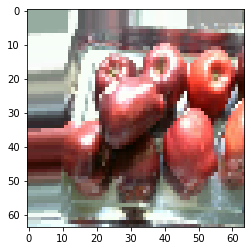

In [10]:
plt.imshow(images[0])

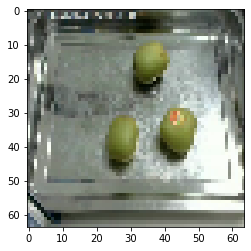

In [14]:
plt.imshow(images[14000])

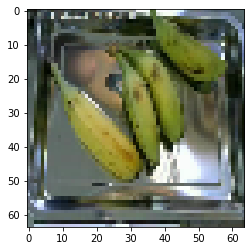

In [16]:
plt.imshow(images[21000])

In [ ]:
images = np.array(images)
labels = np.array(labels)

Veri seti eğitim ve test olacak şekilde veri kümelerine ayrılır.

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2)

Bu kod parçası, HOG (Histogram of Oriented Gradients) özelliklerini eğitim ve test görüntülerinden çıkarır. HOG, bir görüntünün kenarlarının ve köşelerinin yönlerini hesaplayarak, görüntünün lokal gradyanını temsil eden bir özellik vektörü oluşturur.

Kod bloğu, eğitim görüntülerindeki her bir görüntü için HOG özelliklerini çıkarır. HOG özelliklerinin çıkarılması, "hog" fonksiyonu kullanılarak yapılır. "hog" fonksiyonu, "orientations" argümanı ile belirtilen sayıda yöne sahip bir histogram oluşturur. "pixels_per_cell" argümanı, her hücre için kaç piksel kullanılacağını belirtir. "cells_per_block" argümanı, hücrelerin bloklara nasıl bölüneceğini belirler. "feature_vector" argümanı, özellik vektörünün düzleştirilmesi gerekip gerekmediğini belirler. "multichannel" argümanı, birden fazla kanalın (renk kanalları gibi) kullanılıp kullanılmayacağını belirler. "channel_axis" argümanı, hangi eksende kanalların bulunduğunu belirtir.

In [8]:
hog_features = []
i = 0
for image in train_images:
    hog_feature = hog(image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True, multichannel=True, channel_axis=-1)
    hog_features.append(hog_feature)
    i = i + 1
train_features = np.array(hog_features) # Eğitim için gerekli özellikler çıkarılır
i = 0
hog_features = []
for image in test_images:
    hog_feature = hog(image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True, multichannel=True, channel_axis=-1)
    hog_features.append(hog_feature)
    i = i + 1
test_features = np.array(hog_features) # Test için gerekli özellikler çıkarılır


/var/folders/f_/gyqrcdtx623ff04lttt2nxm40000gn/T/ipykernel_13258/1815871730.py:6: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True, multichannel=True, channel_axis=-1)
/var/folders/f_/gyqrcdtx623ff04lttt2nxm40000gn/T/ipykernel_13258/1815871730.py:13: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True, multichannel=True, channel_axis=-1)


SIFT (Scale-Invariant Feature Transform) algoritması, görüntü tanıma ve eşleştirme için kullanılan bir özellik çıkarım yöntemidir. Bu yöntem, bir görüntüdeki farklı özellikleri (keypoint) bulmak ve bu özelliklerin bulanıklaşma ölçeklerini dikkate alarak tanımlayıcı vektörleri (descriptor) oluşturmak için kullanılır. Bu yöntem, görüntülerin ölçeklendirilmesine ve döndürülmesine duyarsızdır ve birbirleriyle karşılaştırılabilirliği sağlar.

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

Bu kod parçası, görüntülerden SIFT (Scale-Invariant Feature Transform) özniteliklerini çıkarır. SIFT, görüntülerdeki özellikleri algılamak ve eşleştirmek için kullanılan bir özellik tanımlama algoritmasıdır. İlk olarak, train_images listesindeki her bir görüntü, gri ölçeklendirme yapılarak gri tonlamalı hale getirilir. Daha sonra, SIFT algoritması bu gri ölçeklendirilmiş görüntüler üzerinde uygulanır. SIFT, görüntülerin belli bir boyut skalasına göre ölçeklendirilmiş noktalarını (keypoints) belirler ve her bir nokta için bir öznitelik vektörü (descriptor) hesaplar. 

Bu öznitelik vektörleri train_features_sift listesine eklerken, train_labels_sift liste de eğitim verisi için görüntülerin sınıf etiketlerini tutar. Bu işlem sonucunda, train_features_sift adlı liste, her bir görüntü için çıkarılmış SIFT özniteliklerini içeren birer numpy dizisi olarak oluşturulur.

In [ ]:
train_features_sift = []
train_labels_sift = []  # etiketleri takip etmek için yeni bir liste
for i, image in enumerate(train_images):
    # Gri ölçeklendirme uygulanıyor çünkü sift renk değerlerine duyarsızdır
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Keypoint'ler ve descriptor'lar çıkarılıyor
    kp, des = sift.detectAndCompute(gray, None)
    # Eğer descriptor'lar varsa, train_features_sift listesine eklenirken, train_labels_sift listesine etiketleri ekleniyor
    if des is not None:
        train_features_sift.append(des)
        train_labels_sift += [train_labels[i]] * des.shape[0]  
train_features_sift = np.concatenate(train_features_sift, axis=0)
train_labels_sift = np.array(train_labels_sift)

Bu kontrol önemlidir çünkü eğitim özelliklerinin her biri bir etiketle eşleştirilmelidir ve bu etiketlerin doğru sayıda olduğundan emin olmak gerekir. Bu nedenle, eğitim özelliklerinin boyutunun etiket boyutu ile eşleştiğinden emin olmak için bu assert ifadesi kullanılır.

In [ ]:
assert train_features_sift.shape[0] == train_labels_sift.shape[0]

Bu kod parçası görüntülerden SIFT özniteliklerini çıkarır. SIFT, görüntülerdeki özellikleri algılamak ve eşleştirmek için kullanılan bir özellik tanımlama algoritmasıdır. İlk olarak, test_images listesindeki her bir görüntü, gri ölçeklendirme yapılarak gri tonlamalı hale getirilir. Daha sonra, SIFT algoritması bu gri ölçeklendirilmiş görüntüler üzerinde uygulanır. SIFT algoritması görüntülerin belli bir boyut skalasına göre ölçeklendirilmiş noktalarını (keypoints) belirler ve her bir nokta için bir öznitelik vektörü hesaplar. 

Bu öznitelik vektörleri test_features_sift listesine eklerken, test_labels_sift liste de eğitim verisi için görüntülerin sınıf etiketlerini tutar. Bu işlem sonucunda, test_features_sift adlı liste, her bir görüntü için çıkarılmış SIFT özniteliklerini içeren birer numpy dizisi olarak oluşturulur.

In [9]:
test_features_sift = []
test_labels_sift = []  
for i, image in enumerate(test_images):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    kp, des = sift.detectAndCompute(gray, None)
    if des is not None:
        test_features_sift.append(des)
        test_labels_sift += [train_labels[i]] * des.shape[0] 
test_features_sift = np.concatenate(test_features_sift, axis=0)
test_labels_sift = np.array(test_labels_sift)

[ WARN:0@120.039] global shadow_sift.hpp:15 SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


Bu kod parçası, SIFT özellik çıkarıcısını kullanarak görüntülerden özelliklerin çıkarılması ve ardından çıkarılan özelliklerin Random Forest algoritması kullanılarak sınıflandırılması ve performans ölçütlerinin hesaplanması işlemlerini içerir.
İlk önce, Random Forest sınıflandırıcısının 200 decision tree kullanarak ve max ağaç derinliği 40 olacak şekilde oluşturulması için parametreler ayarlanır. 
Ardından eğitim gerçekleştirilir.

In [17]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=40, random_state=42)
rfc.fit(train_features_sift, train_labels_sift)
y_pred_sift = rfc.predict(test_features_sift)
accuracy_sift = accuracy_score(test_labels_sift, y_pred_sift)
precision_sift = precision_score(test_labels_sift, y_pred_sift, average='macro')
recall_sift = recall_score(test_labels_sift, y_pred_sift, average='macro')
f1_sift = f1_score(test_labels_sift, y_pred_sift, average='macro')
print("Accuracy:", accuracy_sift)
print("Precision:", precision_sift)
print("Recall:", recall_sift)
print("F1 score:", f1_sift)

Accuracy: 0.1358281306836319
Precision: 0.08762575992503979
Recall: 0.08326300853349539
F1 score: 0.03987175873649513


Bu kod parçası, Random Forest algoritması kullanarak görüntü sınıflandırma işlemi gerçekleştirir.

İlk önce RandomForestClassifier sınıfı kullanılarak bir sınıflandırıcı oluşturulur. Bu sınıf için n_estimators parametresi, RFC'nin toplam ağaç sayısını belirler. max_depth parametresi ise RFC'nin her bir ağacının max derinliğini belirler. random_state parametresi ise RFC'nin aynı sonuçları üretmesi için kullanılır.

In [11]:
clf = RandomForestClassifier(n_estimators=200, max_depth=40, random_state=42)
clf.fit(train_features, train_labels)
y_pred = clf.predict(test_features)
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred, average='macro')
recall = recall_score(test_labels, y_pred, average='macro')
f1 = f1_score(test_labels, y_pred, average='macro')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7984886649874056
Precision: 0.931395247602568
Recall: 0.7808001206457221
F1 score: 0.8324307268018032


Random Forest algoritması SIFT ve HOG özellikleri için test edildi ve gerekli skorlar elde edildi 

In [ ]:
sift_scores = [accuracy_sift, precision_sift, recall_sift, f1_sift]
sift_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
hog_scores = [accuracy, precision, recall, f1]
hog_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

SIFT algoritması görüntülerdeki benzersiz özellikleri tanımlamak için kullanılır ve genellikle nesne tanıma ve eşleştirme gibi görevlerde iyi performans gösterir. Ancak, gri ölçeklendirme kullanılarak işlenir, bu nedenle renk bilgisi kaybedilir ve bu bazı durumlarda performansı etkileyebilir.

HOG algoritması görüntülerdeki kenarları ve diğer özellikleri tanımlamak için kullanılır ve genellikle nesne tespiti ve insan tanıma gibi görevlerde iyi performans gösterir. Renk bilgisini kaybetmez, bu da onun bazı durumlarda daha iyi performans göstermesini sağlayabilir.

Görsel olarak karşılaştırıldığında, HOG'un SIFT'ten daha yüksek skorlar verdiği görülür, bu da HOG'un verilen veri kümesinde daha iyi bir özellik çıkarım yöntemi olduğunu gösterir.

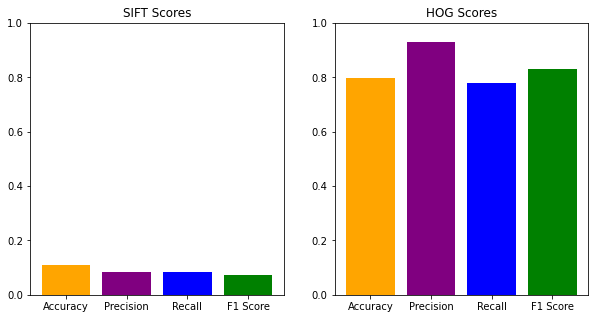

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.bar(sift_labels, sift_scores, color=['orange', 'purple', 'blue', 'green'])
ax1.set_title('SIFT Scores')
ax1.set_ylim(0, 1)
ax2.bar(hog_labels, hog_scores, color=['orange', 'purple', 'blue', 'green'])
ax2.set_title('HOG Scores')
ax2.set_ylim(0, 1)
plt.show()


Bu kod K-Nearest Neighbors classification algoritmasını kullanarak test verilerinin tahminlerini yapar ve sonuçları hesaplar.

İlk olarak, KNeighborsClassifier sınıfından bir nesne oluşturulur ve n_neighbors parametresi 10 olarak ayarlanır. Ardından, fit() yöntemi kullanılarak eğitim özellikleri ve etiketleri verileri KNN modeline uygun hale getirilir.

In [13]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_features, train_labels)
y_pred_knn = knn.predict(test_features)
accuracy_knn = accuracy_score(test_labels, y_pred_knn)
precision_knn = precision_score(test_labels, y_pred_knn, average='macro')
recall_knn = recall_score(test_labels, y_pred_knn, average='macro')
f1_knn = f1_score(test_labels, y_pred_knn, average='macro')
print("\nK-Nearest Neighbors Classifier:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 score:", f1_knn)


K-Nearest Neighbors Classifier:
Accuracy: 0.7925618610164469
Precision: 0.8518845551833111
Recall: 0.7876839136001624
F1 score: 0.8098798108806334


Bu kod bloğunda bir SVM modeli eğitilir ve test veri kümesinde tahminler yapılır. Daha sonra, modelin performansı değerlendirilir.

İlk olarak, bir SVC sınıfı nesnesi oluşturulur ve lineer çekirdek kullanılarak eğitilir. Ardından, eğitilmiş model test özellikleri üzerinde tahminler yapar ve sonuçları predictions değişkeninde saklar.

In [14]:
svm_model = SVC(kernel='linear')
svm_model.fit(train_features, train_labels)
predictions = svm_model.predict(test_features)
accuracy_svm = accuracy_score(test_labels, predictions)
precision_svm = precision_score(test_labels, predictions, average='macro')
recall_svm = recall_score(test_labels, predictions, average='macro')
f1_svm = f1_score(test_labels, predictions, average='macro')
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 score:", f1_svm)

Accuracy: 0.7807082530745295
Precision: 0.8187667436658405
Recall: 0.7765917264548134
F1 score: 0.7938800857374727


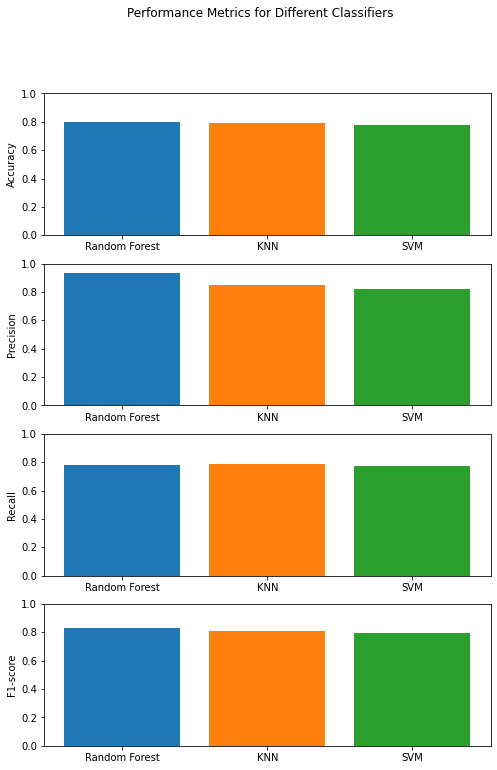

In [15]:
import matplotlib.pyplot as plt
values = [[accuracy, precision, recall, f1], 
          [accuracy_knn, precision_knn, recall_knn, f1_knn], 
          [accuracy_svm, precision_svm, recall_svm, f1_svm]]
classifiers = ['Random Forest', 'KNN', 'SVM']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
fig, axs = plt.subplots(nrows=len(metrics), figsize=(8, 12))
for i in range(len(metrics)):
    for j in range(len(classifiers)):
        axs[i].bar(classifiers[j], values[j][i])
        axs[i].set_ylabel(metrics[i])
        axs[i].set_ylim(0, 1)
fig.suptitle('Performance Metrics for Different Classifiers')
plt.show()


Bu meyve sınıflandırma projesi için Random Forest, K-Nearest Neighbors ve SVM gibi sınıflandırma modelleri karşılaştırıldığında, en iyi sonuçları Random Forest sağladığı görülebilir. Bu, proje için kullanılan özellik vektörlerinin yoğunluğuna ve dağılımına dayandığı doğası nedeniyle ve Random Forest'un bu özellikleri yakalamak için daha uygun bir modele sahip olmasından kaynaklanmaktadır. Ayrıca, Random Forest veri setindeki gürültüye daha dirençlidir ve genellikle daha iyi performans gösterir. K-Nearest Neighbors ve SVM modelleri de iyi sonuçlar sağlamış olsa da, bu modellerin özellik vektörlerinin boyutuna daha duyarlı olduğu gözlemlenmiştir. Özellikle yüksek boyutlu özellik vektörleriyle SVM daha iyi performans gösterirken, K-Nearest Neighbors daha düşük boyutlu özellik vektörleriyle daha iyi performans gösterir.

In [19]:
print(classification_report(test_labels, predictions, target_names=fruit_and_veg_classes))

              precision    recall  f1-score   support

       Apple       0.54      0.79      0.64      1000
        Pear       0.76      0.74      0.75       590
 Pomegranate       0.86      0.76      0.81       458
        Kiwi       0.92      0.87      0.89       822
        Plum       0.98      1.00      0.99       449
   Carambola       0.79      0.74      0.76       387
   muskmelon       0.85      0.75      0.80       444
      Banana       0.81      0.75      0.78       599
      Tomato       0.76      0.69      0.72       430
   Persimmon       0.86      0.76      0.81       462
      Orange       0.77      0.71      0.74       577
       Peach       0.92      0.77      0.84       531

    accuracy                           0.78      6749
   macro avg       0.82      0.78      0.79      6749
weighted avg       0.80      0.78      0.79      6749

